In [1]:
import pandas as pd
import numpy as np
import statistics
from sklearn.model_selection import StratifiedShuffleSplit
import math
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
import keras

from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import random


ModuleNotFoundError: No module named 'keras'

In [2]:
data = pd.read_csv("roundnessdata.csv",skip_blank_lines = False)
#train_df = pd.read_csv("traindata.csv",skip_blank_lines = False)
#test_df = pd.read_csv("testdata.csv")

In [18]:
vector[:,:,0].shape

(4, 60)

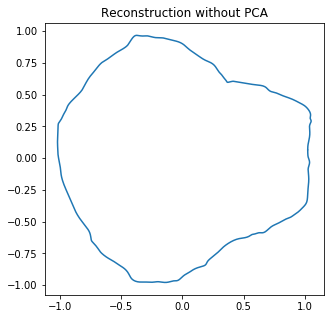

In [31]:
A0=0
C0=0
recon=np.zeros((leng_chain,2))
for t in range(leng_chain):
    x = 0.0
    y = 0.0
    for ii in range(60):
        x = x + (vector[0,ii,0] * np.cos(2 * (ii+1) * np.pi * (t+1) / leng_chain) + vector[1,ii,0] * np.sin(2 * (ii+1) * np.pi* (t+1) / leng_chain))
        y = y + (vector[2,ii,0] * np.cos(2 * (ii+1) * np.pi * (t+1) / leng_chain) + vector[3,ii,0] * np.sin(2 * (ii+1) * np.pi* (t+1) / leng_chain))
    recon[t,0] = A0 + x
    recon[t,1] = C0 + y 
# print(recon[0:9,:])    
plt.figure(figsize=(5, 5))   
plt.plot(recon[:,0], recon[:,1]);   
plt.title('Reconstruction without PCA')
plt.show()   

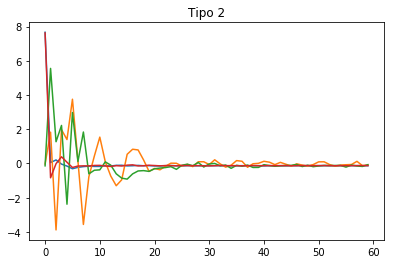

In [32]:
leng_chain=869
scaler = StandardScaler()
fig = plt.figure(figsize = (14,4))
arr = np.transpose(vector[:,:,0])
arr_std=scaler.fit_transform(arr)
b = fig.add_subplot(1, 2, 2)
b.set_title('Tipo 2')
plt.plot(arr_std2[:,0])
plt.plot(arr_std2[:,1])
plt.plot(arr_std2[:,2])
plt.plot(arr_std2[:,3])
plt.show()

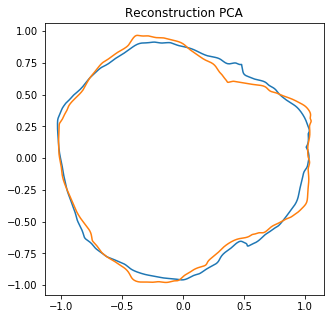

In [36]:
#pca = PCA(n_components=4)
pca = PCA(n_components=2,svd_solver='full')
pca.fit(arr_std)
pca_data=pca.transform(arr_std)
# print (pca.explained_variance_)
# print (pca.explained_variance_ratio_)
# print (pca.explained_variance_ratio_.cumsum())

eigenvectores=pca.components_
eigenvalores=pca.singular_values_
# per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)
# labels=['PC'+str(x) for x in range(1,len(per_var)+1)]
# plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)

reco=pca.inverse_transform(pca_data)
reco=scaler.inverse_transform(reco)
# print(reco.shape)

reco=reco.T
A0=0
C0=0
recon2=np.zeros((leng_chain,2))
for t in range(leng_chain):
    x = 0.0
    y = 0.0
    for ii in range(60):
        x = x + (reco[0,ii] * np.cos(2 * (ii+1) * np.pi * (t+1) / leng_chain) + reco[1,ii] * np.sin(2 * (ii+1) * np.pi* (t+1) / leng_chain))
        y = y + (reco[2,ii] * np.cos(2 * (ii+1) * np.pi * (t+1) /leng_chain) + reco[3,ii] * np.sin(2 * (ii+1) * np.pi* (t+1) / leng_chain))
    recon2[t,0] = A0 + x
    recon2[t,1] = C0 + y 
# print(recon[0:9,:])    
plt.figure(figsize=(5, 5))   
plt.plot(recon2[:,0], recon2[:,1]);  
plt.plot(recon[:,0], recon[:,1]);  
plt.title('Reconstruction PCA')
plt.show() 

In [126]:
#Se acomoda la información de cada particula
matrix = np.zeros((data.shape[0],60*3))
vector = np.transpose(data.iloc[:,1:241])
sc = StandardScaler() 
#vector = sc.fit_transform(vector) 
vector = vector.values.reshape(4,60,data.shape[0])
pca = PCA(3,svd_solver='full') 
#pca.fit(np.transpose(vector[:,:,0])) 

In [127]:
#Se ejecuta la estandarización y el pca de cada
for i in range(0,vector.shape[2]):
    vector[:,:,i] = sc.fit_transform(vector[:,:,i]) 
    
    matrix[i,:]=np.concatenate(np.transpose(pca.fit_transform(np.transpose(vector[:,:,i]))))
    print(pca.explained_variance_ratio_.cumsum())

[0.41819025 0.73734009 1.        ]
[0.45700619 0.74102832 1.        ]
[0.45163976 0.79948332 1.        ]
[0.419342  0.7414501 1.       ]
[0.41819025 0.73734009 1.        ]
[0.46344388 0.76389829 1.        ]
[0.45669702 0.78104437 1.        ]
[0.41591269 0.75101585 1.        ]
[0.46648005 0.78302801 1.        ]
[0.40126985 0.75893512 1.        ]
[0.38297587 0.74019245 1.        ]
[0.43125321 0.7352089  1.        ]
[0.4016713 0.766212  1.       ]
[0.42409809 0.74600644 1.        ]
[0.36882255 0.71362111 1.        ]
[0.43213675 0.75266672 1.        ]
[0.40856334 0.7337673  1.        ]
[0.40399642 0.75240187 1.        ]
[0.39032865 0.74973136 1.        ]
[0.42037894 0.75027634 1.        ]
[0.45648622 0.75006541 1.        ]
[0.38269201 0.73709454 1.        ]
[0.3807336 0.7600394 1.       ]
[0.41035339 0.78209078 1.        ]
[0.43980502 0.78549794 1.        ]
[0.44378907 0.78173707 1.        ]
[0.38499539 0.75456389 1.        ]
[0.47156748 0.78618757 1.        ]
[0.38814607 0.75633023 1.    

In [141]:
train_x = data.iloc[:,1:242]
train_x.iloc[:,np.r_[10:50,70:110,130:170,190:230]]

,finalCellRound12,finalCellRound13,finalCellRound14,finalCellRound15,finalCellRound16,finalCellRound17,finalCellRound18,finalCellRound19,finalCellRound20,finalCellRound21,...,finalCellRound222,finalCellRound223,finalCellRound224,finalCellRound225,finalCellRound226,finalCellRound227,finalCellRound228,finalCellRound229,finalCellRound230,finalCellRound231
0,-0.005375,0.000907,-0.002034,0.002673,0.003462,-0.001481,-0.000165,0.002448,-2.094360e-04,0.000625,...,-0.000032,0.000243,-0.000036,0.000197,2.902590e-04,-0.000598,-0.000346,0.000380,2.555260e-04,-0.000181
1,-0.003329,0.000802,-0.002572,0.002850,-0.004152,-0.000358,0.000145,0.002405,-6.114940e-04,-0.000782,...,-0.000212,0.000376,0.000650,0.000239,-5.532030e-04,-0.000662,0.000327,-0.000201,-3.023220e-04,-0.000028
2,-0.005432,-0.000938,-0.003403,0.000676,-0.002334,0.001118,0.001137,0.000367,-9.658800e-04,0.001375,...,-0.000791,0.000011,-0.000175,0.000553,6.326580e-04,-0.000490,0.000303,-0.000199,-5.262500e-04,-0.000213
3,-0.004834,-0.001204,0.001179,-0.004259,0.005127,-0.002151,0.001278,-0.000077,-7.813280e-04,-0.000856,...,0.000252,-0.000535,-0.000646,0.000048,3.750230e-04,0.000756,-0.000593,0.000016,-6.382460e-05,0.000245
4,-0.005375,0.000907,-0.002034,0.002673,0.003462,-0.001481,-0.000165,0.002448,-2.094360e-04,0.000625,...,-0.000032,0.000243,-0.000036,0.000197,2.902590e-04,-0.000598,-0.000346,0.000380,2.555260e-04,-0.000181
5,-0.001248,0.002840,0.005780,0.008358,0.003803,0.000345,0.000082,-0.002928,-5.263905e-03,0.000493,...,-0.001002,-0.001119,0.000967,0.000771,-8.101130e-04,-0.000620,0.000419,0.000368,3.747530e-05,0.000558
6,0.003628,0.002370,0.000583,0.000759,0.000291,-0.000415,0.001822,-0.002338,2.638560e-04,-0.002654,...,0.000106,0.000322,-0.000012,-0.000019,7.183270e-05,-0.000011,0.000069,0.000034,7.958810e-05,-0.000009
7,0.000653,-0.000921,0.003840,-0.000388,-0.002282,-0.001161,-0.002523,-0.004537,1.828361e-03,-0.002241,...,0.000160,-0.000106,-0.000043,0.000046,-6.734560e-05,-0.000002,0.000202,0.000009,9.139020e-05,-0.000085
8,0.002433,0.011296,-0.001376,0.005447,-0.001290,0.002234,-0.002260,-0.001540,3.486120e-04,-0.000841,...,-0.000718,-0.000061,-0.000059,-0.000447,-2.031150e-04,-0.000069,-0.000233,0.000078,1.299680e-04,-0.000079
9,0.003923,-0.002733,-0.001230,0.003893,0.003567,0.000028,0.001175,-0.001628,7.394220e-04,-0.002497,...,-0.000375,-0.000298,0.000234,0.000250,2.409810e-04,0.000174,0.000033,-0.000082,4.674860e-05,-0.000032


<function matplotlib.pyplot.show(*args, **kw)>

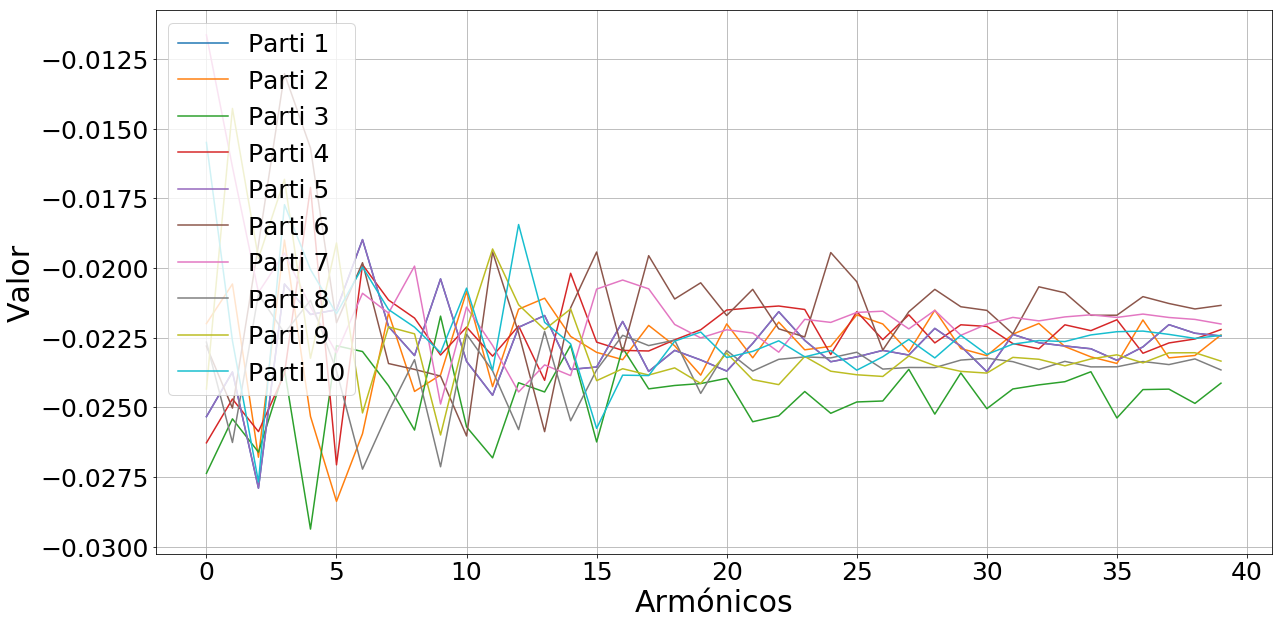

In [6]:
plt.figure(figsize=(20,10)) 
#range(test_res['predicted'].shape[0],0,-1)
plt.plot(matrix[0,10:50], label="Parti 1") 
plt.plot(matrix[1,10:50], label="Parti 2") 
plt.plot(matrix[2,10:50], label="Parti 3") 
plt.plot(matrix[3,10:50], label="Parti 4") 
plt.plot(matrix[4,10:50], label="Parti 5") 
plt.plot(matrix[5,10:50], label="Parti 6") 
plt.plot(matrix[6,10:50], label="Parti 7") 
plt.plot(matrix[7,10:50], label="Parti 8") 
plt.plot(matrix[8,10:50], label="Parti 9") 
plt.plot(matrix[9,10:50], label="Parti 10") 
plt.rc('legend', fontsize=25) 
plt.ylabel('Valor', fontsize=30) 
plt.xlabel('Armónicos', fontsize=30) 
plt.legend(loc="upper left")

#plt.title("Resultado del entrenamiento de la red neuronal profunda",fontsize=35) 
plt.xticks(size = 25) 
plt.yticks(size = 25) 
plt.grid(True) 
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

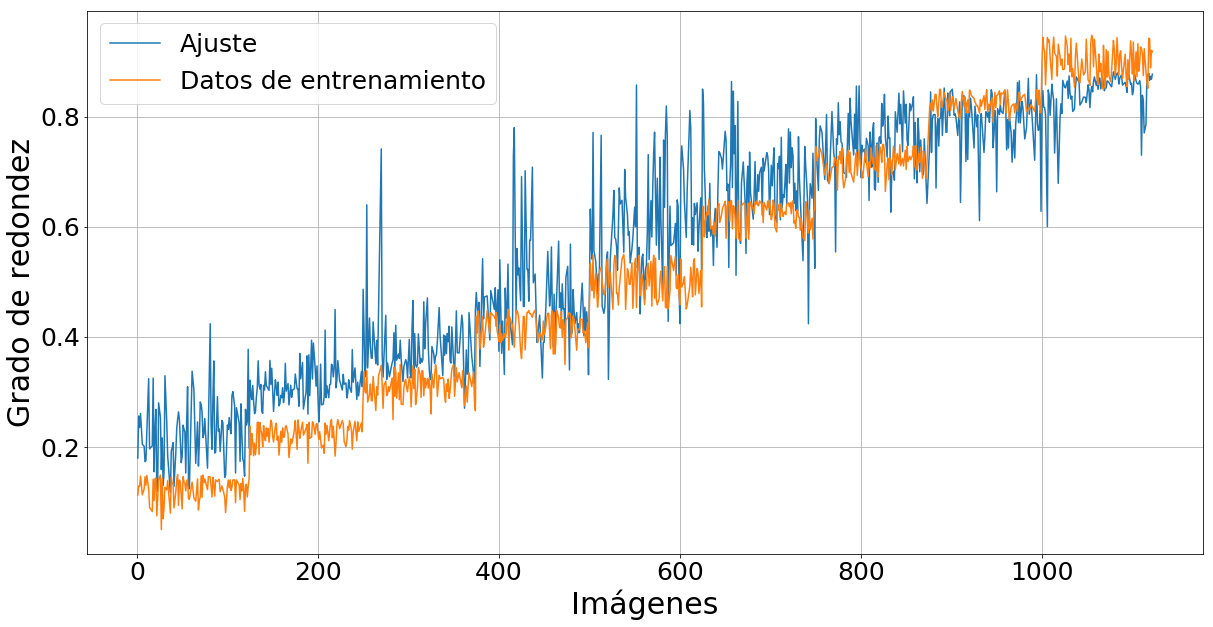

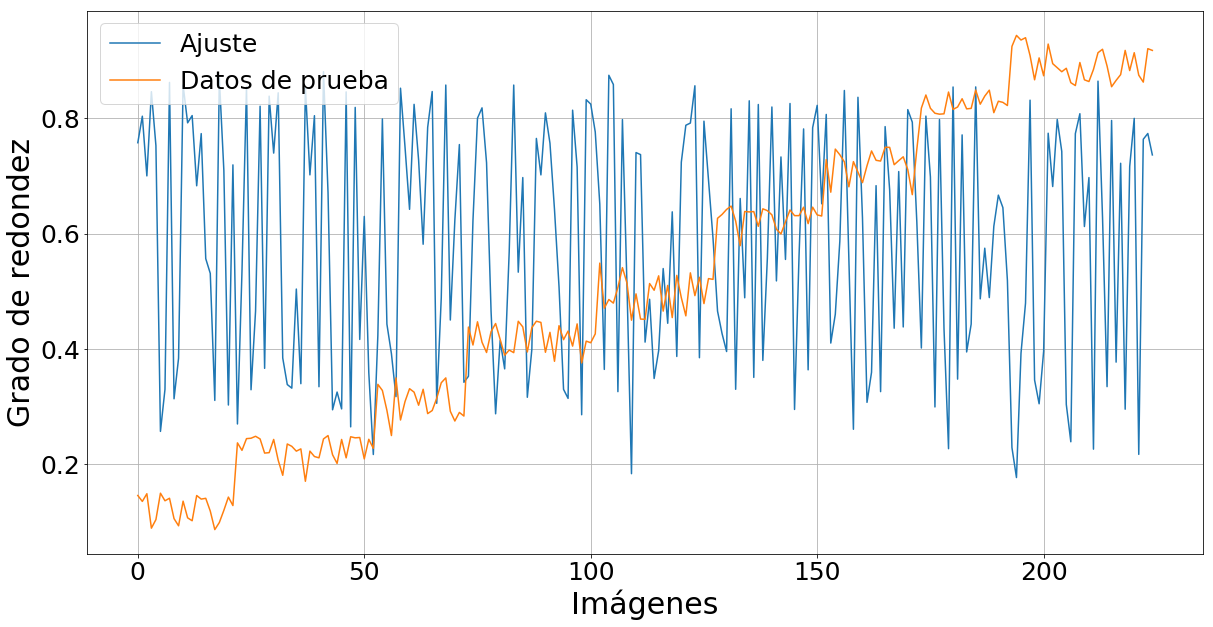

In [165]:
#lim_inf = 1
#lim_sup = 242
#neuronas = 10 
train_x = data.iloc[:,1:242]

train_y = data.iloc[:,0:1]
#np.r_[661:848,0:98]
#train_x = train_df.iloc[:,lim_inf:lim_sup]

#train_y = train_df.iloc[:,0:1]
#np.r_[214:275,0:27]
#test_x = test_df.iloc[:,lim_inf:lim_sup]

#test_y = test_df.iloc[:,0:1]

#Para cuando se usa PCA
#train_x, test_x, train_y, test_y = train_test_split(matrix[:,np.r_[9:50,69:100,109:150]], train_y, test_size=0.2)
#Cuando se usa los datos directo 5:50,65:110,125:170,185:230
train_x, test_x, train_y, test_y = train_test_split(train_x.iloc[:,np.r_[5:50,65:110,125:170,185:230]], train_y, test_size=0.2)

#sc = StandardScaler() 
#train_x = sc.fit_transform(train_x) 
#test_x = sc.transform(test_x)

n_cols = train_x.shape[1] 
model = Sequential() 
model.add(Dense(100, activation="relu", input_shape=(n_cols,))) 
model.add(Dense(200,activation="relu")) 
model.add(Dense(300,activation="relu")) 
model.add(Dense(400,activation="relu")) 
model.add(Dense(500,activation="relu")) 
model.add(Dense(600,activation="relu"))
model.add(Dense(700,activation="relu")) 
model.add(Dense(1,activation="linear")) 
opt = keras.optimizers.RMSprop( learning_rate=.00015)

#my_lr_scheduler = keras.callbacks.LearningRateScheduler(adapt_learning_rate) 
model.compile(optimizer=opt, loss='mae',metrics=['mae','mse','mape','cosine'])

#set early stopping monitor so the model stops training when it won't improve anymore 
early_stopping_monitor = EarlyStopping(patience=12,monitor='loss')

#train model #,callbacks=[early_stopping_monitor]
model.fit(train_x,train_y,validation_data = (test_x,test_y),callbacks=[early_stopping_monitor], epochs=300,verbose=0)

##Train

#train_y = train_y.reset_index().sort_values('index')

#train_x = train_x[train_y.index]

#train_y = train_y.reset_index()

ynew = model.predict(train_x) 
diff = abs(ynew - train_y) 
dummy_y = train_y 
dummy_y['predicted'] = ynew 
mse = mean_squared_error(dummy_y['roundness'], dummy_y['predicted']) 
me = statistics.stdev(dummy_y['predicted'])/math.sqrt(dummy_y['predicted'].shape[0]) 
fig0 = plt.figure(0,figsize=(20,10)) 
#range(dummy_y['predicted'].shape[0],0,-1),
plt.plot(dummy_y['predicted'].sort_index(), label="Ajuste") 
plt.plot(dummy_y['roundness'].sort_index(), label="Datos de entrenamiento") 
plt.rc('legend', fontsize=25) 
plt.ylabel('Grado de redondez', fontsize=30) 
plt.xlabel('Imágenes', fontsize=30) 
plt.legend(loc="upper left")

#plt.title("Resultado del entrenamiento de la red neuronal profunda",fontsize=35)
plt.xticks(size = 25) 
plt.yticks(size = 25) 
plt.grid(True)
plt.show 
plt.savefig('redondezComparacion.png')

##Test

#test_res = test_y 

#test_res = test_res.reset_index().sort_values('index') 
#test_x = test_x[test_res.index]

#test_x = test_x.reset_index()

#test_x = test_x.iloc[:,1:test_x.shape[1]] 
#test_res = test_res.reset_index() 
ynew = model.predict(test_x) 
diff = abs(ynew - test_y) 
test_res['predicted'] = ynew 
mse = mean_squared_error(test_res['roundness'], test_res['predicted']) 
me = statistics.stdev(test_res['predicted'])/math.sqrt(test_res['predicted'].shape[0]) 
plt.figure(figsize=(20,10)) 
#range(test_res['predicted'].shape[0],0,-1)
plt.plot(test_res['predicted'].sort_index(), label="Ajuste") 
plt.plot(test_res['roundness'].sort_index(), label="Datos de prueba") 
plt.rc('legend', fontsize=25) 
plt.ylabel('Grado de redondez', fontsize=30) 
plt.xlabel('Imágenes', fontsize=30) 
plt.legend(loc="upper left")

#plt.title("Resultado del entrenamiento de la red neuronal profunda",fontsize=35) 
plt.xticks(size = 25) 
plt.yticks(size = 25) 
plt.grid(True) 
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

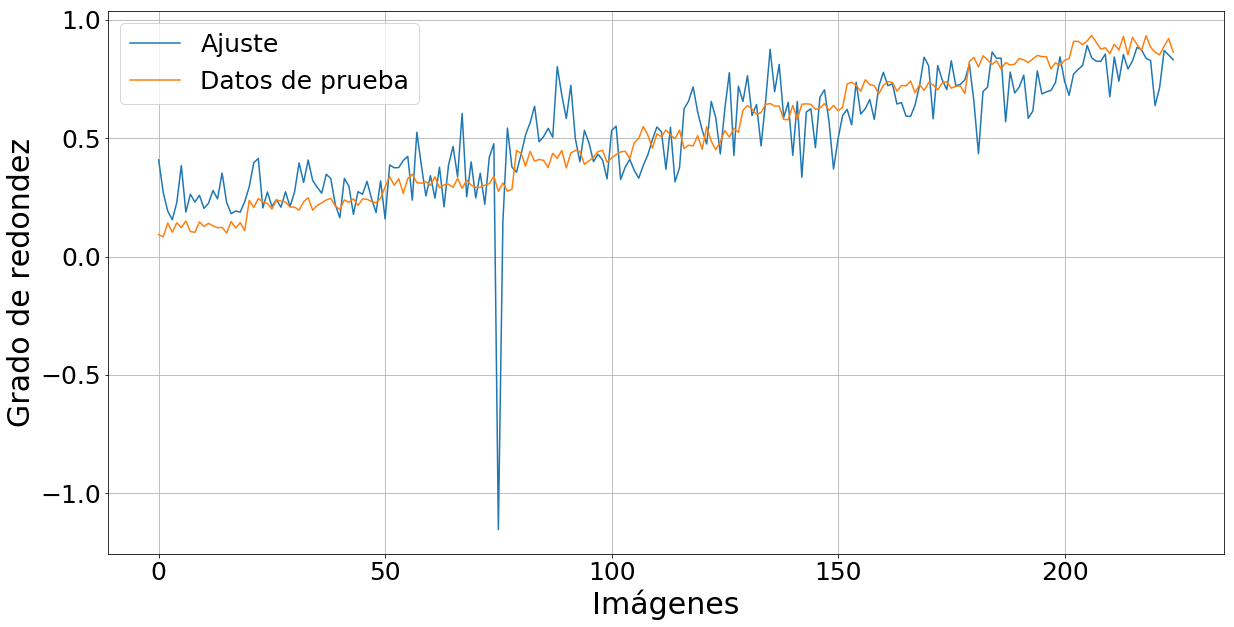

In [426]:
##Test

test_res = test_y
test_res = test_res.reset_index().sort_values('index')
test_x = test_x[test_res.index]
test_res = test_res.reset_index()
ynew = model.predict(test_x)
diff = abs(ynew - test_y)
test_res['predicted'] = ynew
mse = mean_squared_error(test_res['roundness'], test_res['predicted'])
me = statistics.stdev(test_res['predicted'])/math.sqrt(test_res['predicted'].shape[0])
plt.figure(figsize=(20,10))
plt.plot(test_res['predicted'].sort_index(), label="Ajuste")
plt.plot(test_res['roundness'].sort_index(), label="Datos de prueba")
plt.rc('legend', fontsize=25)
plt.ylabel('Grado de redondez', fontsize=30)
plt.xlabel('Imágenes', fontsize=30)
plt.legend(loc="upper left")
#plt.title("Resultado del entrenamiento de la red neuronal profunda",fontsize=35)
plt.xticks(size = 25)
plt.yticks(size = 25)
plt.grid(True)
plt.show

C:\Users\HeavyRain350\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


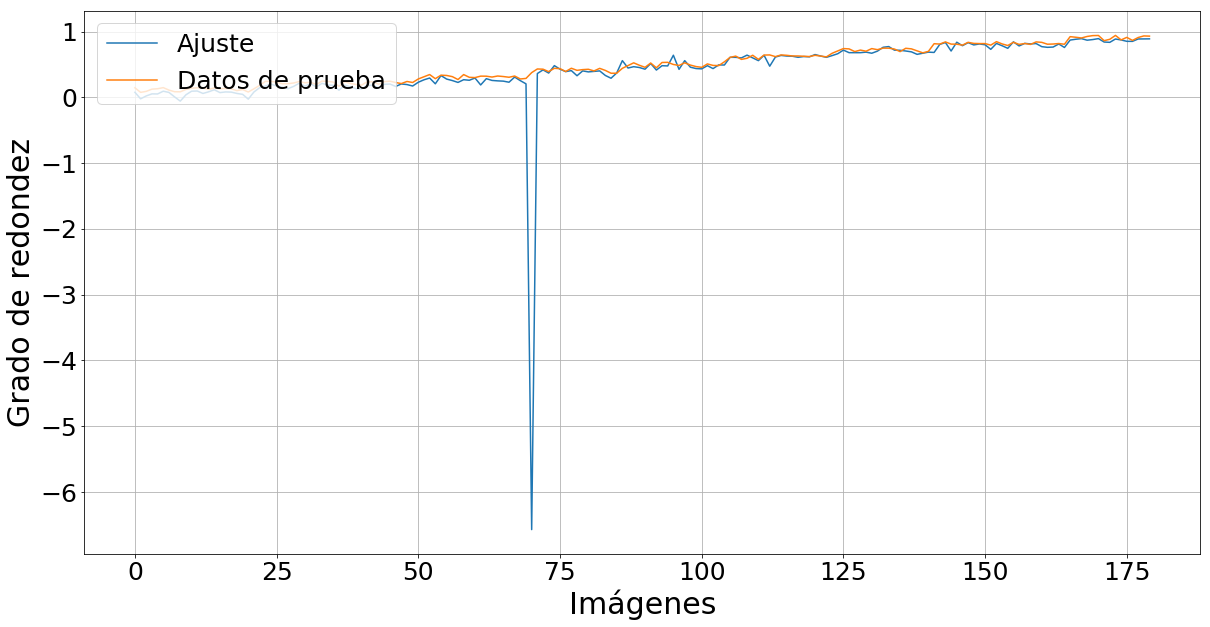

In [464]:
train_x2 = train_x[::5, :]
train_y2 = train_y.iloc[::5,:]
train_y2 = train_y2.reset_index().sort_values('index')
train_x2 = train_x2[train_y2.index]
train_y2 = train_y2.reset_index()
#train_y2 = train_y2.reset_index()
ynew = model.predict(train_x2)
diff = abs(ynew - train_y2)
dummy_y2 = train_y2
dummy_y2['predicted'] = ynew
mse2 = mean_squared_error(dummy_y2['roundness'], dummy_y2['predicted'])
me2 = statistics.stdev(dummy_y2['predicted'])/math.sqrt(dummy_y2['predicted'].shape[0])

figTest=plt.figure(1,figsize=(20,10))
plt.plot(dummy_y2['predicted'].sort_index(), label="Ajuste")
plt.plot(dummy_y2['roundness'].sort_index(), label="Datos de prueba")
plt.rc('legend', fontsize=25)
plt.ylabel('Grado de redondez', fontsize=30)
plt.xlabel('Imágenes', fontsize=30)
plt.legend(loc="upper left")
#plt.title("Resultado del entrenamiento de la red neuronal profunda",fontsize=35)
plt.xticks(size = 25)
plt.yticks(size = 25)
plt.grid(True)
figTest.show()
figTest.savefig('redondezTesting.png')


In [496]:
train_y2=train_y2.reset_index().sort_values('index')

In [501]:
train_y2

,index,roundness,predicted
71,0,0.147144,0.135400
42,3,0.077683,0.072275
24,13,0.135743,0.141120
15,19,0.143410,0.132731
165,21,0.105966,0.108787
96,28,0.089833,0.077534
120,45,0.140080,0.144986
97,49,0.146276,0.145260
101,62,0.122222,0.117849
81,72,0.135640,0.134468


In [386]:
mse
#Error cuadratico medio

0.029263216089917058

In [387]:
me
#Error promedio o estándar

0.017883638095856524

In [388]:
abEr = abs(dummy_y['roundness']-dummy_y['predicted'])

In [419]:
set1 = abEr[abEr < 0.01]
porc = 100*set1.shape[0]/abEr.shape[0]
porc

42.42761692650334

In [420]:
set1 = abEr[abEr < 0.02]
porc = 100*set1.shape[0]/abEr.shape[0]
porc

67.48329621380846

In [421]:
set1 = abEr[abEr < 0.05]
porc = 100*set1.shape[0]/abEr.shape[0]
porc

91.0913140311804

In [423]:
set1 = abEr[abEr < 0.08]
porc = 100*set1.shape[0]/abEr.shape[0]
porc

96.88195991091314

In [424]:
set1 = abEr[abEr < 0.09]
porc = 100*set1.shape[0]/abEr.shape[0]
porc

97.55011135857461

In [422]:
set1 = abEr[abEr < 0.1]
porc = 100*set1.shape[0]/abEr.shape[0]
porc

98.21826280623608

In [452]:
dummy_y


,roundness,predicted
210,0.211329,0.219201
704,0.620382,0.609260
705,0.590895,0.572035
877,0.830665,0.805237
663,0.578033,0.659726
462,0.448553,0.400879
718,0.643433,0.638363
1095,0.903000,0.860226
234,0.218078,0.207795
1065,0.851000,0.807937


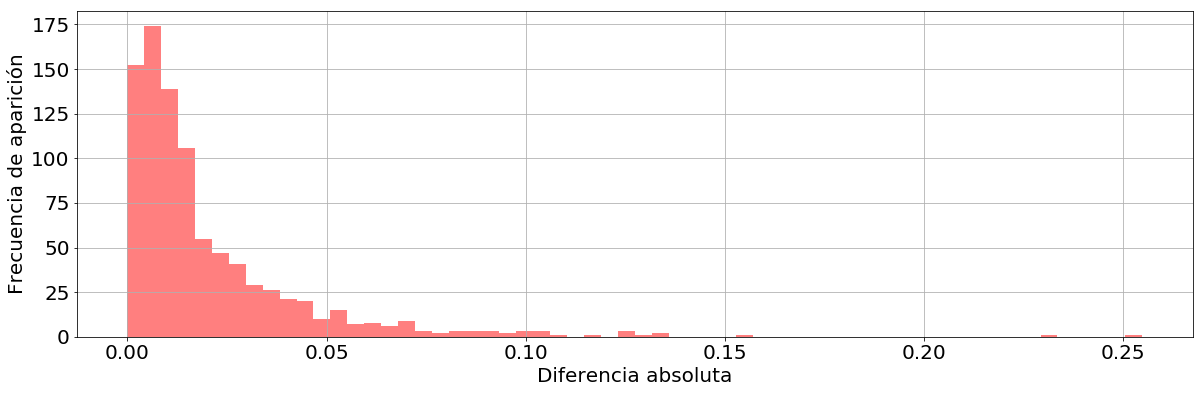

In [506]:
fig=plt.figure(figsize=(20,6))
n, bins, patches = plt.hist(abEr, 60, facecolor='red', alpha=0.5)

# add a 'best fit' line
plt.xlabel('Diferencia absoluta', fontsize=20)
plt.ylabel('Frecuencia de aparición', fontsize=20)

# Tweak spacing to prevent clipping of ylabel
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.grid(True)
#plt.title("Histograma del error absoluto",fontsize=28)
plt.show()
fig.savefig('histogramaError.png')

In [504]:
#Error cuadratico medio
mse2

0.0011868462656432707

In [505]:
#Error estandar o promedio
me2

0.01929572372362336